C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


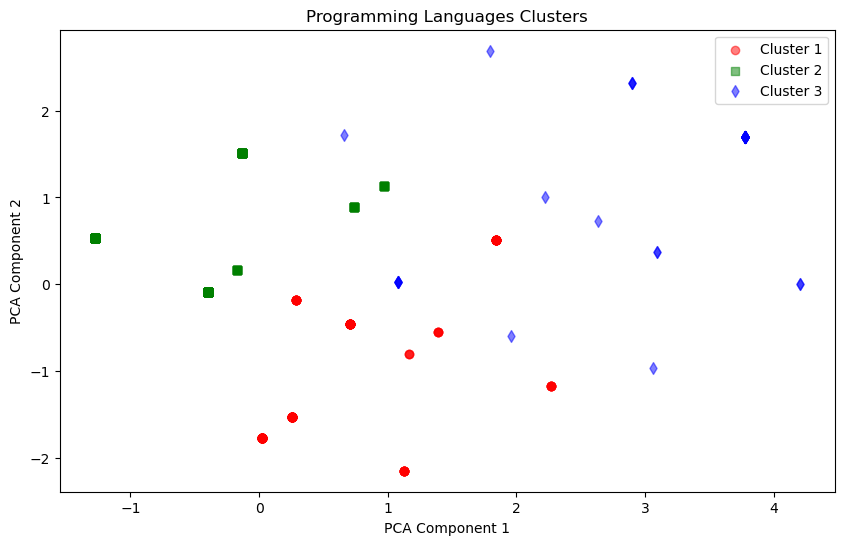

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the CSV data into a DataFrame
df = pd.read_csv('college.csv')

# Drop any rows with missing values if necessary
df = df.dropna()

# Extract the column with programming languages
programming_languages = df['Which Programming Languages are you Proficient in?']

# Use CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(';'))
X = vectorizer.fit_transform(programming_languages)

# Convert to array and normalize the data
X_array = X.toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

# Use K-Means to create clusters
num_clusters = 3  # Change this number based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'd']
for cluster in range(num_clusters):
    cluster_data = X_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                color=colors[cluster], marker=markers[cluster], 
                label=f'Cluster {cluster + 1}', alpha=0.5)

plt.title('Programming Languages Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
